# Задание

In [213]:
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Задание 1

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

Клиенты, которым должны одобрить заявку на кредит: Ольга, Петр

In [214]:
df = pd.read_csv("../datasets/credit_scoring.csv")
approves_people = df[(df['Возраст'] > 18) & (df["Месячный доход"] > 10000)]
approves_people

,Имя,Возраст,Месячный доход
1,Ольга,43,12000
4,Петр,21,20000


## Задание 2

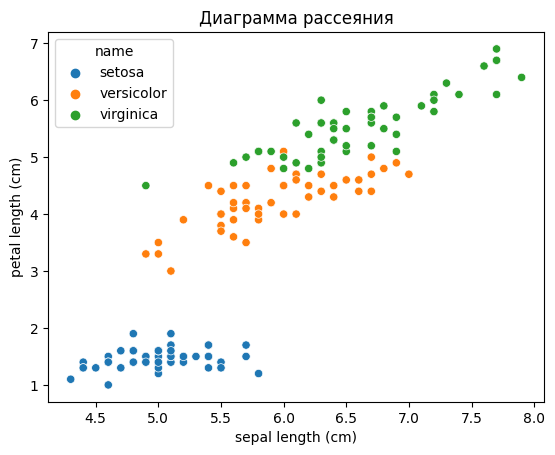

In [215]:
# Код тут
iris_ = load_iris()
iris_frame = pd.DataFrame(iris_.data)
iris_frame.columns = iris_.feature_names
iris_frame['target'] = iris_.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris_.target_names[x])
x = iris_frame['sepal length (cm)']
y = iris_frame['petal length (cm)']
c = iris_frame['name']
plt.title("Диаграмма рассеяния")
ax = sns.scatterplot(data=iris_frame, x=x, y=y, hue=c)

## Задание 3

In [216]:
# Код тут
X = iris_frame[['sepal length (cm)', 'petal length (cm)']]
y = iris_frame['target']

# разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучение дерева решений с глубиной 2
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# вычисление точности классификации на тестовой выборке
accuracy = clf.score(X_test, y_test)

# вывод результата
print(f'Точность классификации: {accuracy:.3f}')

Точность классификации: 0.967


## Задание 4

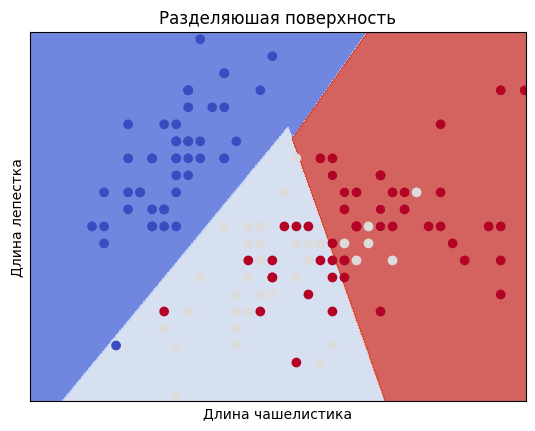

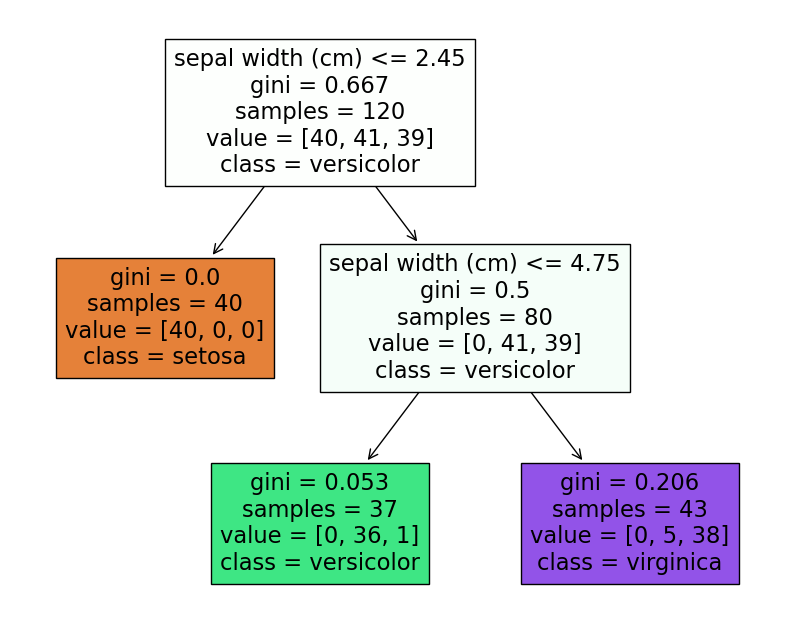

In [217]:
# Код тут
X = iris_.data[:, :2]  # берем только два признака
y = iris_.target

# нормализация данных
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# создание экземпляра классификатора SVM
C = 1.0  # параметр регуляризации
svc = svm.SVC(kernel='linear', C=C)

# обучение SVM
svc.fit(X, y)
# создание сетки для построения разделяющей поверхности
xx, yy = np.meshgrid(np.linspace(-2.5, 2.5, 500), np.linspace(-2.5, 2.5, 500))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# построение разделяющей поверхности и графика данных
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title("Разделяюшая поверхность")
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.show()

# построение дерева решений
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

У получившегося дерева 4 листов

## Задание 5

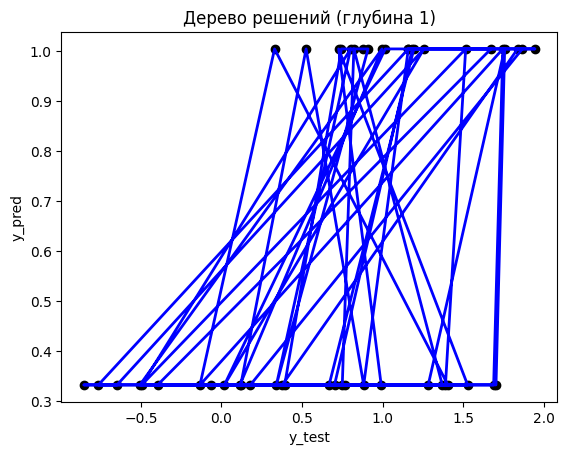

In [205]:
# Код тут
def generate_sin(sample_size, n=1):
    np.random.seed(42)
    X = np.random.random((sample_size, n))*3
    coeffs = 1 + 2 * np.random.random((n, 1))
    y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((sample_size, 1))
    return X, y

X, y = generate_sin(250)[0], generate_sin(250)[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeRegressor(max_depth=1)
clf.fit(X_train.reshape(-1, 1), y_train)

# делаем предсказания на тестовой выборке
y_pred = clf.predict(X_test.reshape(-1, 1))

# строим график истинных ответов и предсказаний модели
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=2)
plt.title("Дерево решений (глубина 1)")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Задание 6

In [206]:
# Код тут
X = iris_frame[['sepal length (cm)', 'petal length (cm)']]
y = iris_frame['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = range(1, 31)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    diff_score = test_score - train_score
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score],
                                    'diff_score': [diff_score],
                                   'mse': [mse]})
    scores_data = scores_data.append(temp_score_data)

scores_data[(scores_data['diff_score'] == scores_data['diff_score'].min())] 

,max_depth,train_score,test_score,cross_val_score,diff_score,mse
0,8,0.983333,0.9,0.9,-0.083333,0.1


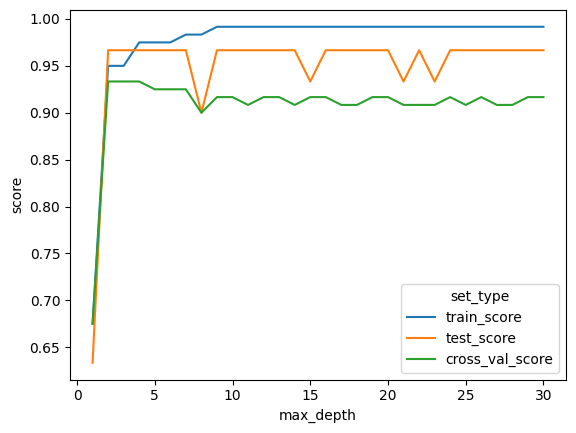

In [207]:
ax = sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)

Глубина дерева, на котором MSE на тестовой выборке наилучший: 8

## Задание 7

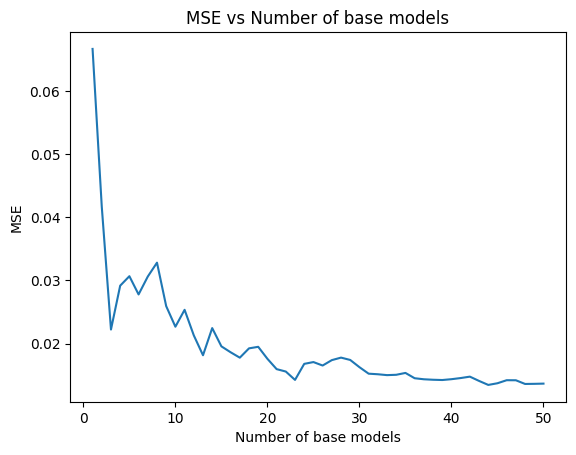

In [208]:
# Код тут
X = iris_frame[['sepal length (cm)', 'petal length (cm)']]
y = iris_frame['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)

n_estimators_list = range(1, 51)
mse_list = []
for n_estimators in n_estimators_list:
    model = BaggingRegressor(base_estimator=clf, n_estimators=n_estimators, bootstrap=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.plot(n_estimators_list, mse_list)
plt.xlabel('Number of base models')
plt.ylabel('MSE')
plt.title('MSE vs Number of base models')
plt.show()

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 50

## Задание 8

In [209]:
# Код тут
clf_rand = RandomForestRegressor(max_depth=5,  n_estimators=100, max_features=1, random_state=42)
clf_rand.fit(X_train, y_train)
y_pred = clf_rand.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
round(mse,3)

0.022